# 다중 분류(Multiclass Classification) 복습
---
**데이터셋**: HumanActivityRecognition
- train.csv
- test.csv

**다중 분류**(Multiclass Classification)

**SVM**(Support Vector Machine, 서포트 벡터 머신)

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import myutils as my # myutils.py 파일

### 데이터 준비 & 전처리
- train.csv

In [ ]:
# !gdown https://drive.google.com/uc?id=1ypa5iZ1dLDO-zGRO_yDXrJnMvjRGUG4v

Downloading...
From: https://drive.google.com/uc?id=1ypa5iZ1dLDO-zGRO_yDXrJnMvjRGUG4v
To: /content/HumanActivityRecognition.zip
100% 25.7M/25.7M [00:00<00:00, 41.7MB/s]


In [ ]:
!unzip HumanActivityRecognition.zip -d HumanActivityRecognition/

Archive:  HumanActivityRecognition.zip
  inflating: HumanActivityRecognition/test.csv  
  inflating: HumanActivityRecognition/train.csv  


In [ ]:
train = pd.read_csv('./HumanActivityRecognition/train.csv')
train.shape

(7352, 563)

In [ ]:
# 결측치 확인
train.isna().sum(axis=0)

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [ ]:
# 중복치 확인
train.duplicated().sum()

0

In [ ]:
# X, y 분리
X_train = train.drop(['Activity'], axis=1)
y_train = train['Activity']

print(X_train.shape, y_train.shape)

(7352, 562) (7352,)


In [ ]:
# Activity 컬럼 데이터의 고유값들의 종류
y_train.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
# 범주형 변수의 인코딩
encoding_dic= {'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}
y_train = y_train.map(encoding_dic)

In [ ]:
y_train.value_counts()

0    1407
2    1374
1    1286
3    1226
5    1073
4     986
Name: Activity, dtype: int64

- **표준화**(Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
y_train = y_train.values

In [ ]:
type(X_train_s), type(y_train)

(numpy.ndarray, numpy.ndarray)

### 베스트 모델 찾기
- **하이퍼파라미터 최적화**: 그리드 서치(GridSearchCV)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

params = [
    {
        'C': param_range, 
     'gamma': param_range, 
     'kernel': ['rbf']
    }, 
    {
        'C': param_range, 
     'kernel': ['linear']
    }, 
    {
        'C': param_range, 
     'degree': [2, 3], 
     'kernel': ['poly']
    }
]

clf = SVC(random_state=42)

gs = GridSearchCV(estimator=clf, 
                  param_grid = params, 
                  scoring='accuracy', 
                  cv=3, 
                  n_jobs=-1, 
                  verbose=3
                  )
gs.fit(X_train_s, y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'degree': [2, 3], 'kernel': ['poly']}],
             scoring='accuracy', verbose=3)

In [ ]:
gs.best_estimator_

SVC(C=0.1, kernel='linear', random_state=42)

In [ ]:
gs.best_score_

0.9366170131863435

In [ ]:
gs.best_params_

{'C': 0.1, 'kernel': 'linear'}

### 학습

In [ ]:
clf = SVC(C=0.1, kernel='linear', random_state=42)
clf.fit(X_train_s, y_train)

SVC(C=0.1, kernel='linear', random_state=42)

### 예측
- test.csv

In [ ]:
test = pd.read_csv('./HumanActivityRecognition/test.csv')
test.shape

(2947, 563)

In [ ]:
X_test = test.drop(['Activity'], axis=1)
y_test = test['Activity']

In [ ]:
X_test_s = scaler.transform(X_test)
y_test = y_test.map(encoding_dic).values

print(type(X_test_s), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
y_pred = clf.predict(X_test_s)
y_pred

array([2, 2, 2, ..., 5, 5, 5])

- **성능 평가**

In [ ]:
my.print_score(y_test, y_pred, average='macro')

accuracy: 0.9606379368849678
precision: 0.9627496637122351
recall: 0.9596082484083199


- **혼동 행렬**(confusion matrix)

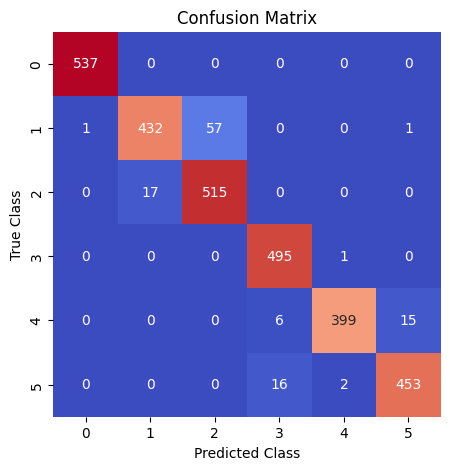

In [ ]:
my.plot_confusion_matrix(y_test, y_pred)